# Analysis de origen de los datos de audio
Se comprueba y compara el rendimiento de dos modelos con la misma arquitectura entrenados con datos captados con
microcontrolador y con datos de fuentes externas respectivamente.
## Imports

In [1]:
from audio_model_evaluation import tensorflow_model_evaluation

## Parámetros

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/audio"
micro_data_test_dir = f"{project_dir}/samples/microcontroller/audio/test"
micro_data_all_dir = f"{project_dir}/samples/microcontroller/audio/all"
ext_data_test_dir = f"{project_dir}/samples/external/audio/test"
ext_data_all_dir = f"{project_dir}/samples/external/audio/all"
micro_model_dir = f"{saved_models_dir}/tensorflow/MicroAudioDataModel"
ext_model_dir = f"{saved_models_dir}/tensorflow/ExtAudioDataModel"
label_index_dir = f"{saved_models_dir}/label index mappings"
micro_label_index_path = f"{label_index_dir}/MicroAudioDataModel.joblib"
ext_label_index_path = f"{label_index_dir}/ExtAudioDataModel.joblib"

## Modelo entrenado con datos de origen externo
Comprobamos el rendimiento del modelo entrenado con datos de origen externo con la partición test de los
datos de origen externo y con el conjunto de imágenes obtenidas con microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow/ExtAudioDataModel".
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/external/audio/test".
Using 3232 samples.


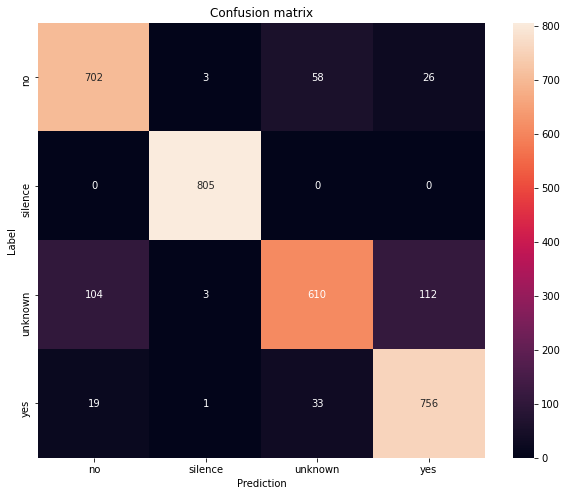

              precision    recall  f1-score   support

          no    0.85091   0.88973   0.86989       789
     silence    0.99138   1.00000   0.99567       805
     unknown    0.87019   0.73583   0.79739       829
         yes    0.84564   0.93449   0.88784       809

    accuracy                        0.88892      3232
   macro avg    0.88953   0.89001   0.88770      3232
weighted avg    0.88952   0.88892   0.88712      3232

Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/audio/all".
Using 452 samples.


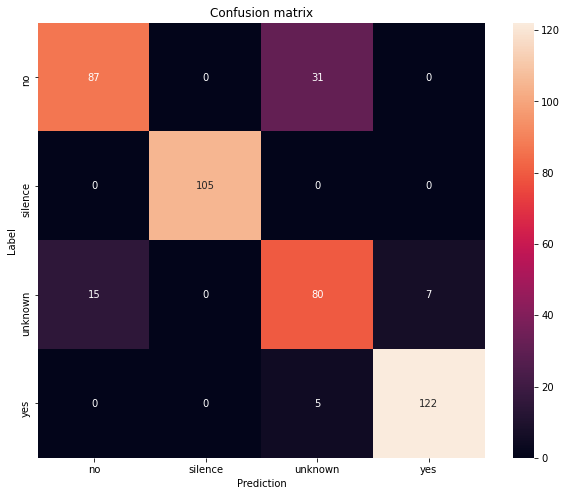

              precision    recall  f1-score   support

          no    0.85294   0.73729   0.79091       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.68966   0.78431   0.73394       102
         yes    0.94574   0.96063   0.95312       127

    accuracy                        0.87168       452
   macro avg    0.87208   0.87056   0.86949       452
weighted avg    0.87633   0.87168   0.87220       452



In [3]:
tensorflow_model_evaluation(ext_model_dir, ext_label_index_path, [ext_data_test_dir, micro_data_all_dir])

## Modelo entrenado con datos obtenidos con microcontrolador
Comprobamos el rendimiento del modelo entrenado con datos obtenidos con microcontrolador con la partición test de los
datos obtenidos con microcontrolador y con la partición test de los datos de origen externo.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow/MicroAudioDataModel".
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/audio/test".
Using 91 samples.


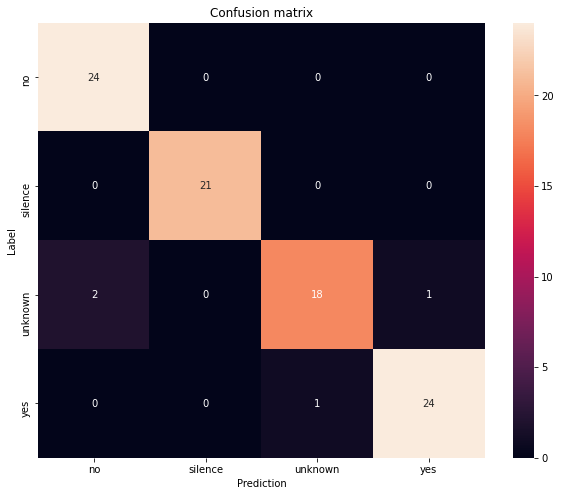

              precision    recall  f1-score   support

          no    0.92308   1.00000   0.96000        24
     silence    1.00000   1.00000   1.00000        21
     unknown    0.94737   0.85714   0.90000        21
         yes    0.96000   0.96000   0.96000        25

    accuracy                        0.95604        91
   macro avg    0.95761   0.95429   0.95500        91
weighted avg    0.95658   0.95604   0.95538        91

Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/external/audio/all".
Using 16154 samples.


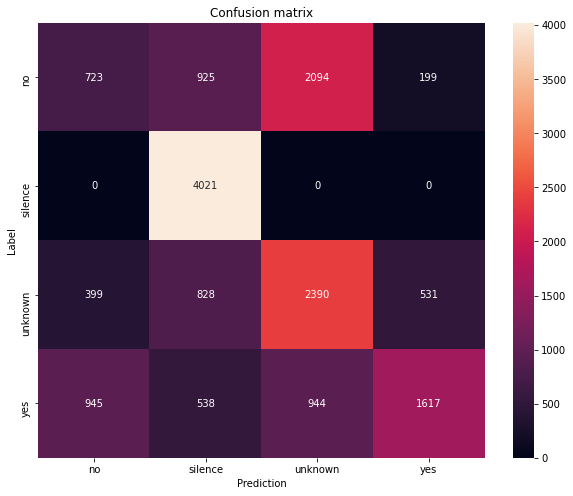

              precision    recall  f1-score   support

          no    0.34978   0.18346   0.24068      3941
     silence    0.63704   1.00000   0.77828      4021
     unknown    0.44031   0.57618   0.49916      4148
         yes    0.68896   0.39985   0.50602      4044

    accuracy                        0.54172     16154
   macro avg    0.52902   0.53987   0.50604     16154
weighted avg    0.52944   0.54172   0.50730     16154



In [4]:
tensorflow_model_evaluation(micro_model_dir, micro_label_index_path, [micro_data_test_dir, ext_data_all_dir])